In [70]:
# This is a test notebook to obtain RS data from GA datacube

from netCDF4 import Dataset
import matplotlib.pyplot as plt

In [71]:
mypath = '/g/data2/u39/public/data/modis'
print(mypath)
import os
os.listdir(mypath)

/g/data2/u39/public/data/modis


['l2sst-5min.v201710.recent',
 'oc-1d-aust.v201508.past',
 'lpdaac-mosaics-cmar',
 'l2oc-5min.v201508.past',
 'l2sst-5min.v201611.past',
 'evi-cube-ga',
 'pds-5min.nrt',
 'lpdaac-tiles-c6',
 'fractionalcover-metrics-abares',
 'lpdaac-ternsites-cmar',
 'l1b-5min.v201508.recent',
 '000-README',
 'l1b-5min.v201409.past',
 'l1b-5min.true-colour',
 'oc.stacked',
 'pds-5min.recent',
 'lpdaac-tiles-c5',
 'fractionalcover-clw',
 'oc-1d-aust.v201508.recent',
 'l2oc-5min.v201508.recent',
 'pds-5min.nrt.orig']

In [74]:
filename = '/g/data2/u39/public/data/modis/lpdaac-tiles-c6/MCD43A4.006/2018.01.01/MCD43A4.A2018001.h32v10.006.2018010031806.hdf'
print(mypath)

/g/data2/u39/public/data/modis


In [75]:
import numpy as np
import h5py

a = np.random.random(size=(100,20))
h5f = h5py.File(filename, 'r')
h5f.create_dataset('dataset_1', data=a)
h5f.close()

OSError: Unable to open file (file signature not found)

In [69]:
module(os)

NameError: name 'module' is not defined

In [15]:
vars = f.variables.keys()
for item in vars:
    print ('Variable: \t', item)
    print ('Dimensions: \t', f[item].dimensions)
    print ('Shape:    \t', f[item].shape, '\n')

Variable: 	 time
Dimensions: 	 ('time',)
Shape:    	 (62,) 

Variable: 	 y
Dimensions: 	 ('y',)
Shape:    	 (4000,) 

Variable: 	 x
Dimensions: 	 ('x',)
Shape:    	 (4000,) 

Variable: 	 crs
Dimensions: 	 ()
Shape:    	 () 

Variable: 	 coastal_aerosol
Dimensions: 	 ('time', 'y', 'x')
Shape:    	 (62, 4000, 4000) 

Variable: 	 blue
Dimensions: 	 ('time', 'y', 'x')
Shape:    	 (62, 4000, 4000) 

Variable: 	 green
Dimensions: 	 ('time', 'y', 'x')
Shape:    	 (62, 4000, 4000) 

Variable: 	 red
Dimensions: 	 ('time', 'y', 'x')
Shape:    	 (62, 4000, 4000) 

Variable: 	 nir
Dimensions: 	 ('time', 'y', 'x')
Shape:    	 (62, 4000, 4000) 

Variable: 	 swir1
Dimensions: 	 ('time', 'y', 'x')
Shape:    	 (62, 4000, 4000) 

Variable: 	 swir2
Dimensions: 	 ('time', 'y', 'x')
Shape:    	 (62, 4000, 4000) 

Variable: 	 dataset
Dimensions: 	 ('time', 'dataset_nchar')
Shape:    	 (62, 27031) 



In [19]:
# Read variables (but not yet extract)
band2 = f['swir1']
y = f['y']
x = f['x']
t = f['time']
print(x,y,t)

<class 'netCDF4._netCDF4.Variable'>
float64 x(x)
    units: metre
    standard_name: projection_x_coordinate
    long_name: x coordinate of projection
unlimited dimensions: 
current shape = (4000,)
filling on, default _FillValue of 9.969209968386869e+36 used
 <class 'netCDF4._netCDF4.Variable'>
float64 y(y)
    units: metre
    standard_name: projection_y_coordinate
    long_name: y coordinate of projection
unlimited dimensions: 
current shape = (4000,)
filling on, default _FillValue of 9.969209968386869e+36 used
 <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: seconds since 1970-01-01 00:00:00
    standard_name: time
    long_name: Time, unix time-stamp
    axis: T
    calendar: standard
unlimited dimensions: 
current shape = (62,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [21]:
# Subset indices
x1, x2 = 1000,3999
y1, y2 = 0,3000
t1 = 9

# Extract
band2_subset = band2[t1, y1:y2, x1:x2]
y_subset = y[y1:y2]
x_subset = x[x1:x2]


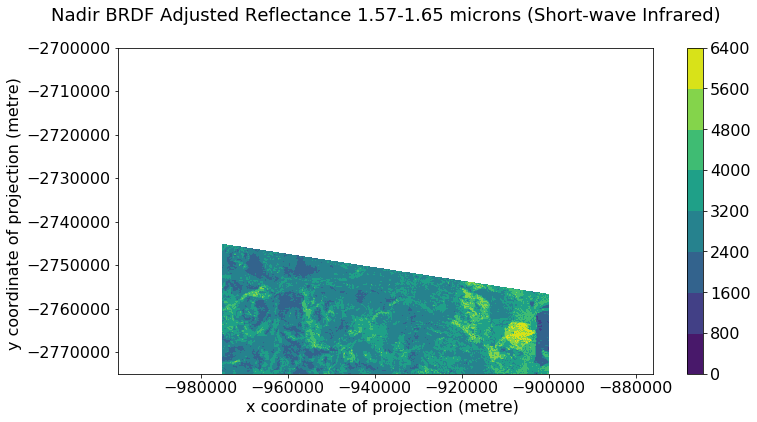

In [27]:

# Set figure size
plt.figure(figsize=(12,6))

# Plot data subset with equal axes and colorbar
plt.contourf(x_subset, y_subset, band2_subset)
plt.axis('equal')
cbar = plt.colorbar()

# Add figure title and labels
# We can make use of the defined variable attributes to do this
plt.title(band2.long_name+'\n', fontsize=18)
plt.xlabel(x.long_name+' ('+x.units+') ', fontsize=16)
plt.ylabel(y.long_name+' ('+y.units+') ', fontsize=16)

# Adjust tick mark size
cbar.ax.tick_params(labelsize=16) 
plt.tick_params(labelsize=16)
plt.show()

In [28]:
import datacube
import xarray as xr

ModuleNotFoundError: No module named 'datacube'